## 1. Problem statement
__Sales__(in thousands of units) for a particular product as a **function** of **advertising budgets**(in thousands of dollars) for TV, radio, and newspaper media. Suppose that in our role as **Data Scientist** we are asked to suggest.

- we want to find a funtion that given input budgets for TV, radio and newspaper **predicts the output sales**.
- which media **contribute** to sales ?
- Visualize the **relationship** between the *features* and the *response* using scatter plots.

## 2. Data Loading and Description

The advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.
- TV-Spend on TV Advertisements
- Radio-Spend on radio Advertisements
- Newspaper-Spend on newspaper Adverisements
- Sales-Sales revenue generated


## Importing Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

import numpy as np
%matplotlib inline

In [16]:
data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv',index_col=0)

In [18]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?

- TV: advertising dollars spent on TV for a single product in a given marker(in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

what is the __response__?

- Sales: sales of a single product in a given market(in thousands of widgets)

## 3.Exploratoy Data Analysis

In [19]:
data.shape

(200, 4)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [21]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

## Distribution of features

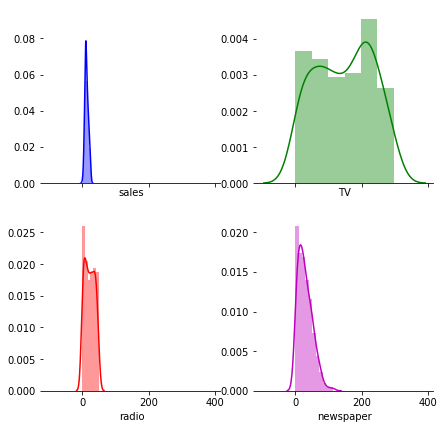

In [63]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True) #axes is used to know which row and column
sns.despine(left=True)                                    # f,is short form of fig
sns.distplot(data.sales, color='b', ax=axes[0,0])
sns.distplot(data.TV, color='g', ax=axes[0,1])
sns.distplot(data.radio, color='r', ax=axes[1,0])
sns.distplot(data.newspaper,color='m', ax=axes[1,1])

## Observations
Sales seems to be **normal distribution**. Spending on newspaper is **rightly skewed**. Most of the spends on newspaper is **fairly low** where are spend on radio and tv seems be **uniform distribution**. Spends on tv are **comparatively higher** than spend on radio and newspaper.

**Same as above code just changed f to fig**

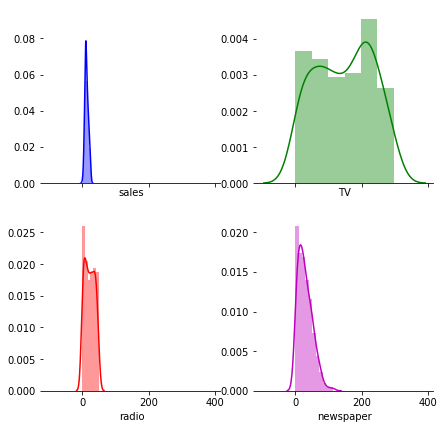

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)                                    
sns.distplot(data.sales, color='b', ax=axes[0,0])
sns.distplot(data.TV, color='g', ax=axes[0,1])
sns.distplot(data.radio, color='r', ax=axes[1,0])
sns.distplot(data.newspaper,color='m', ax=axes[1,1])

Is there a relationship between sales and spend various advertising channels...?

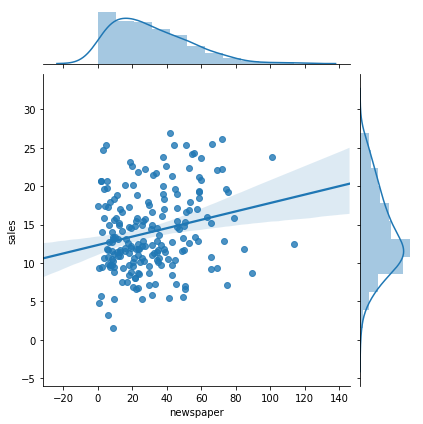

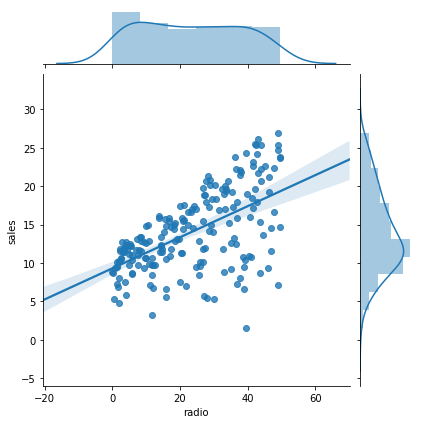

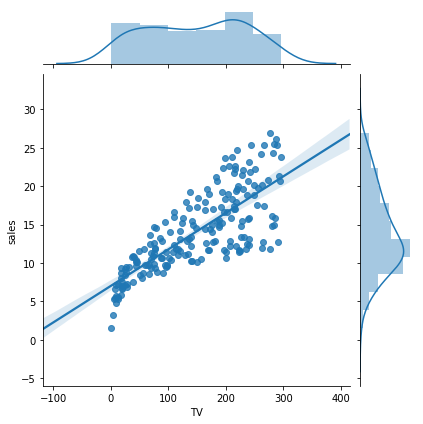

In [74]:
JG1=sns.jointplot('newspaper','sales', data=data, kind='reg')
JG2=sns.jointplot('radio','sales', data=data, kind='reg')
JG3=sns.jointplot('TV','sales', data=data, kind='reg')

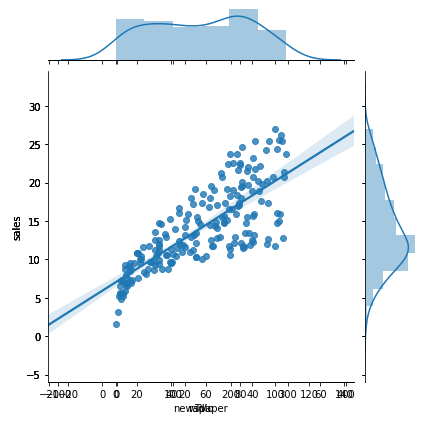

In [75]:
#subplots migration
f=plt.figure()
for J in [JG1,JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A),A)

## Observation
Sales spend on newspaper is **not** highly correlated where are sales and spend on tv is __highly correlated__

# Visualising Pairwise Correlation

C:\Users\ne6ktn\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


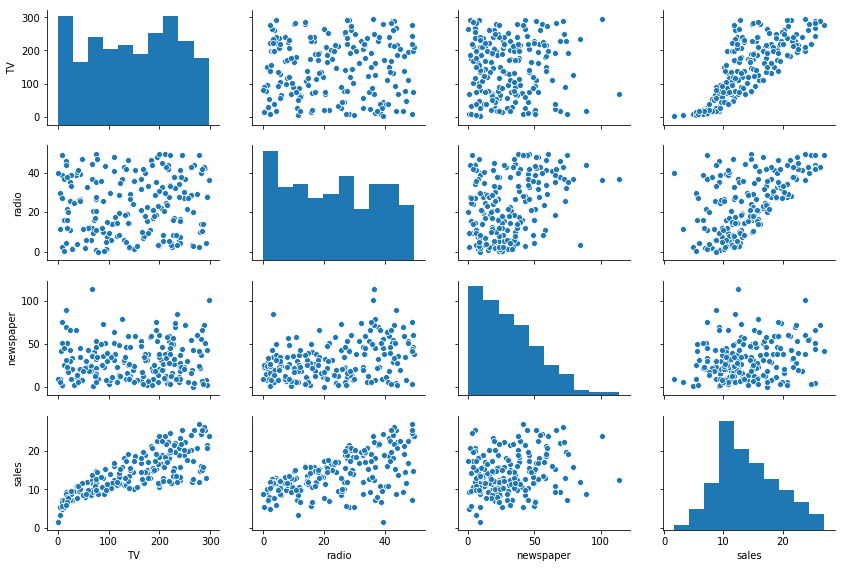

In [81]:
sns.pairplot(data,size=2,aspect=1.5)

C:\Users\ne6ktn\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


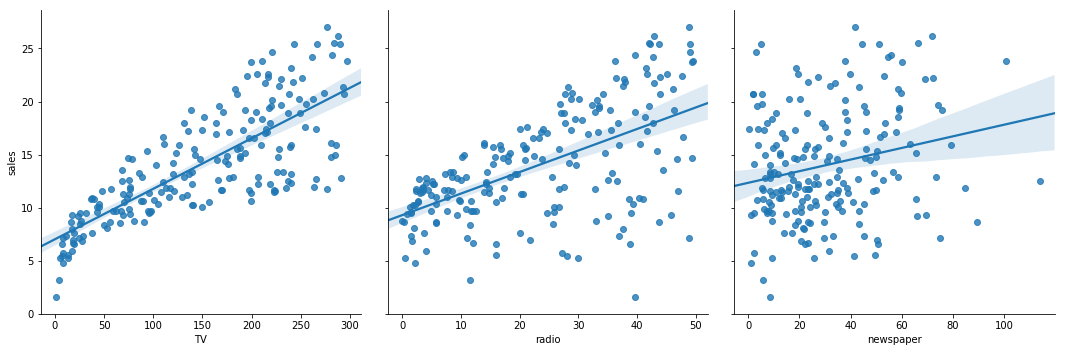

In [89]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=5,kind='reg',aspect=1)

## observations

- Very strong relationship between TV ads and sales
- Weak reationship between radio ads and sales
- very weak relationship between newspaper ads and sales

## Calculating and plotting heatmap correlation

In [90]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


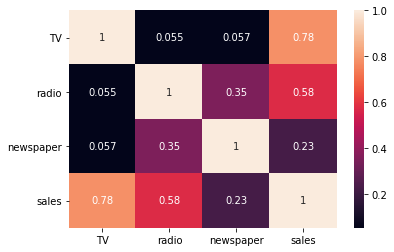

In [92]:
sns.heatmap(data.corr(),annot=True)

## Observations

- The diagonal of the above matrix shows the auto-correlation of the variables. it is always 1. You can observe that the correlation between **TV and Sales is highest i.e 0.78** and then between __sales and radio i.e 0.78__.
- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. Variables with **strong correlations** are mostly probably candidates for **model building**

In [94]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler().fit(data)
data1=scaler.transform(data)

In [98]:
data=pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [100]:
data=pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [102]:
data.columns=['TV','radio','newspaper','sales']
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [103]:
feature_cols=['TV','radio','newspaper']

In [104]:
X=data[feature_cols]

In [106]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [107]:
print(X.shape)

(200, 3)


In [108]:
Y=data.sales

In [109]:
Y.head()

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64

In [110]:
print(type(Y))

<class 'pandas.core.series.Series'>


In [111]:
print(Y.shape)

(200,)


## 4.3 Splitting X and Y into training and test datasets

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
def split(X,Y):
    return train_test_split(X,Y,test_size=0.20)

In [117]:
X_train,X_test,Y_train,Y_test=split(X,Y)
print('Train cases as below')
print('X_train_shape:',X_train.shape)
print('Y_train_shape:',Y_train.shape)

Train cases as below
X_train_shape: (160, 3)
Y_train_shape: (160,)


In [119]:
print('Test cases as below')
print('X_test_shape:',X_test.shape)
print('Y_test_shape:',Y_test.shape)

Test cases as below
X_test_shape: (40, 3)
Y_test_shape: (40,)


## 4.4 Linear Regression in scikit-learn

In [120]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [121]:
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
X_test.shape

(40, 3)

In [124]:
Y_test.iloc[0]

-1.3685544312548688

In [125]:
X_test.iloc[0]

TV          -1.395883
radio       -1.462830
newspaper   -0.453597
Name: 76, dtype: float64

In [126]:
linreg.predict([X_test.iloc[20]])

array([-0.2053851])

In [128]:
Y_test.iloc[20]

-0.2733265957823871

In [129]:
Y_pred=linreg.predict([X_test.iloc[20]])

In [130]:
Y_pred

array([-0.2053851])

In [131]:
linreg.predict(X_test)

array([-1.88741685,  1.17269294, -1.02988949, -1.47150879, -1.1768836 ,
        1.20145533,  2.0040828 ,  0.07034074,  1.54880991,  0.16224096,
        0.09487487,  0.14733834, -1.38549211, -1.13835612,  0.42189735,
       -0.41289734, -0.03173395, -0.77391454,  0.8628166 , -1.37110568,
       -0.2053851 , -0.82614114,  0.36478812, -0.82614043, -0.14200611,
        0.23445913, -0.30494363, -0.07991029, -0.67632132, -1.2591295 ,
       -0.47463735, -1.19601579, -1.3007047 ,  2.09202568, -1.87596694,
        0.60002351, -0.3663336 , -1.5786429 , -1.07512885,  0.80865936])

In [134]:
Y_pred_test=linreg.predict(X_test)

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
RMSE_test=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))

In [144]:
def linear_reg(X,Y,GridSearchCV=False):
    X_train,X_test,Y_train,Y_test=split(X,Y)
    
if not(GridSearchCV):
    linreg.fit(X_train,Y_train)

else:
    from sklearn.model_selection import GridSearchCV
    parameters={'normalize':[True,False],'copy_X=True':[True,False]}
    linreg=GridSearchCV(linreg,parameters,cv=10,refit=True)
    linreg.fit(X_train,Y_train)
    print('Mean cross-validated score of the best_estimator:',linreg.best_score_)
    RMSE_test=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
    print('RMSE for the test set is {}'.format(RMSE_test))
    
return linreg
    

ValueError: Invalid parameter copy_X=True for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.